#Name: Gopi Krishna B S
##The Sparks Foundation
##Data Science and Business Analytics

##Task 5:
## Exploratory Data Analysis

#EDA

1. It is an important step for every data science project.
2. It does all the preprocessing work before using for patterns extraction process.
3. High quality data is rear so, EDA is must.
4. One can see the patterns which will help in deciding which model to choose, which technique to apply, etc... 
5. Once the inferences are made then the data will be classified as useful or not useful.

In [10]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [12]:


match = pd.read_csv("/gdrive/MyDrive/Mini project /matches.csv")
match.head()
match.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [13]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
match.shape

(756, 18)

In [15]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
deliveries = pd.read_csv('/gdrive/MyDrive/Mini project /deliveries.csv')
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [18]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [19]:
deliveries.shape

(179078, 21)

In [20]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [21]:
# replace id as index of reference

match.set_index('id',inplace=True)

#Summary statistics of match data
match.describe(include='all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2009-05-02,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [22]:
#Data preprocessing
match.columns
columns = [col for col in match.columns]
columns

['season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [23]:
match['city'].isnull().sum()

7

In [24]:
# Extract count of null values for each column

# we have null values in city, winner, player_of_match, and for all umpires
# By inferring columns we can find few things
null_entries =[]

for col in columns:
  null_entries.append([col,match[col].isnull().sum()])
  print(col, match[col].nunique())
null_entries
  

season 12
city 32
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 15
win_by_runs 89
win_by_wickets 11
player_of_match 226
venue 41
umpire1 61
umpire2 65
umpire3 25


[['season', 0],
 ['city', 7],
 ['date', 0],
 ['team1', 0],
 ['team2', 0],
 ['toss_winner', 0],
 ['toss_decision', 0],
 ['result', 0],
 ['dl_applied', 0],
 ['winner', 4],
 ['win_by_runs', 0],
 ['win_by_wickets', 0],
 ['player_of_match', 4],
 ['venue', 0],
 ['umpire1', 2],
 ['umpire2', 2],
 ['umpire3', 637]]

In [25]:
#First let's find the venues corresponding to which the values of city are empty
match[match.city.isnull()][['city','venue']]


,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [26]:
#So, missing values can be filled with Dubai

match.city = match.city.fillna('Dubai')

In [27]:
# since there are only 2 entries its ok to leave them
match[(match.umpire1.isnull() |match.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [28]:
# umpire 3 is 92% missing so we need to drop it.

match = match.drop('umpire3',axis = 1)
match

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [29]:
# To count the number of venues per each city

city_venue = match.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df


season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

# Observations

## we noticed that bengaluru and bangalore are same places with different name and chinaswamy is same place but repeated twice so, lets make it as 1 column
## And there are many stadiums repeated with other names we need to replace them as well

In [30]:

match['city'] = match['city'].replace('Bangalore','Bengaluru')
match['venue'] = match['venue'].replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium')
match['venue'] = match['venue'].replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali')
match['venue'] = match['venue'].replace('M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
match['venue'] = match['venue'].replace('Feroz Shah Kotla Ground','Feroz Shah Kotla')
match['venue'] = match['venue'].replace('Rajiv Gandhi International Stadium','Rajiv Gandhi International Stadium, Uppal')


In [31]:
city_venue = match.groupby(['city','venue']).count()['season']
city_venue

city            venue                                              
Abu Dhabi       Sheikh Zayed Stadium                                    7
Ahmedabad       Sardar Patel Stadium, Motera                           12
Bengaluru       M Chinnaswamy Stadium                                  80
Bloemfontein    OUTsurance Oval                                         2
Cape Town       Newlands                                                7
Centurion       SuperSport Park                                        12
Chandigarh      Punjab Cricket Association Stadium, Mohali             46
Chennai         MA Chidambaram Stadium, Chepauk                        57
Cuttack         Barabati Stadium                                        7
Delhi           Feroz Shah Kotla                                       74
Dharamsala      Himachal Pradesh Cricket Association Stadium            9
Dubai           Dubai International Cricket Stadium                     7
Durban          Kingsmead                   

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

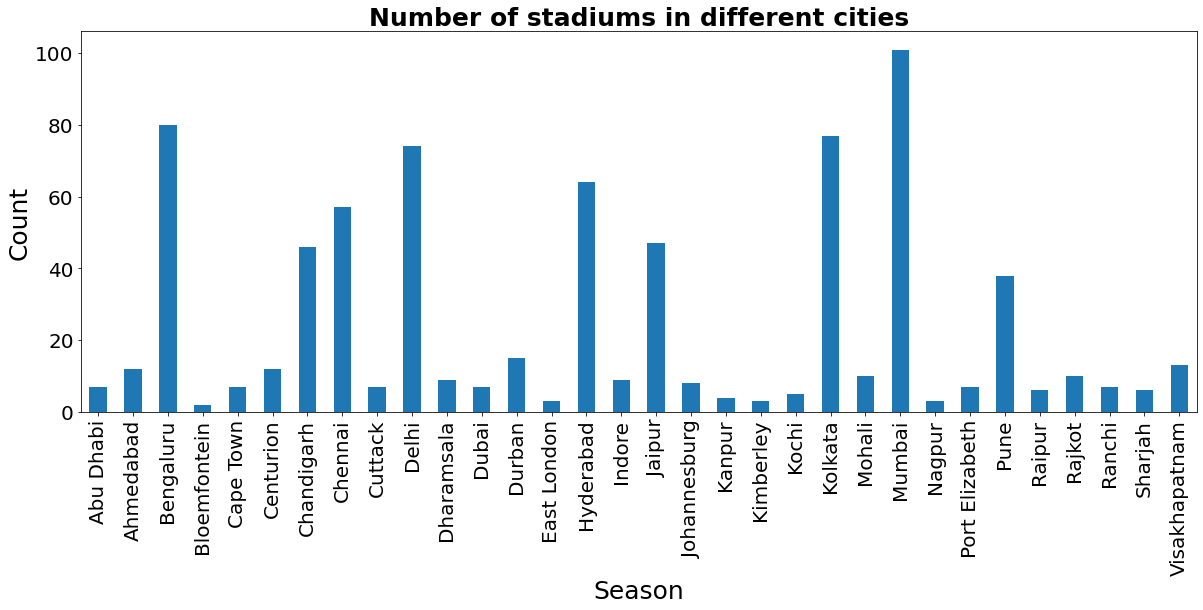

In [32]:
# plot venues v/s cities for better understanding

v = pd.crosstab(match['city'],match['venue'])
#Add a column by summing each columns
v['count'] = v.sum(axis='columns')
b = v['count']
#Plotting
plt.figure(figsize=(20,7))
b.plot(kind='bar')
plt.title("Number of stadiums in different cities", fontsize= 25, fontweight= "bold")
plt.ylabel("Count",size = 25)
plt.xlabel("Season",size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)


# Exploratory Data Analysis:

Number of matches played in each season

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

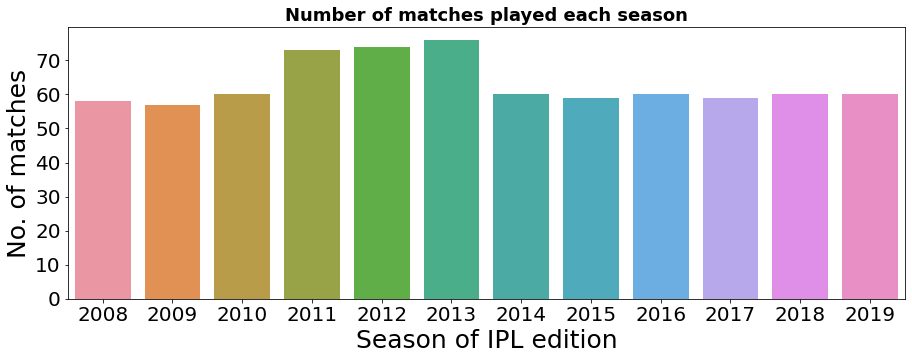

In [33]:
plt.figure(figsize=(15,5))
sns.countplot('season',data = match)
plt.title("Number of matches played each season",fontsize=18,fontweight= "bold")
plt.ylabel("No. of matches",size = 25)
plt.xlabel("Season of IPL edition",size = 25)
plt.xticks(size= 20)
plt.yticks(size = 20)

More matches are played during 2011-2013.


How many teams played in each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

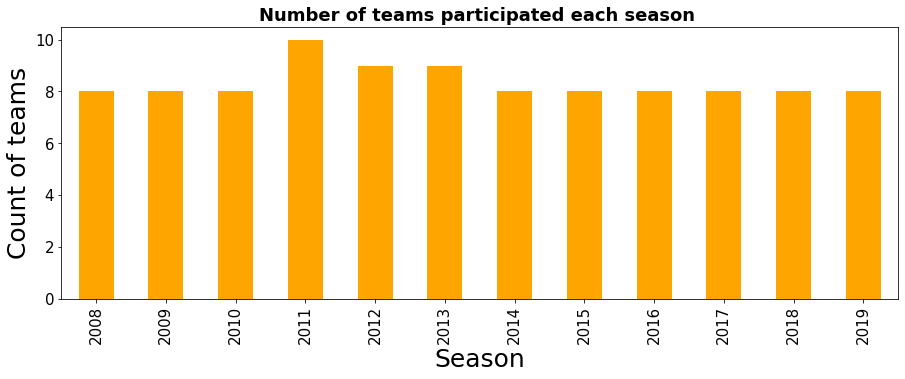

In [34]:
match.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5),color = 'orange')
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

10 teams played in 2011  and 9 teams in 2012 and 2013 rest with 8 teams.

Since there are more teams in 2011-2013 it makes sense to have more matches in that period.

Text(0, 0.5, 'Venue')

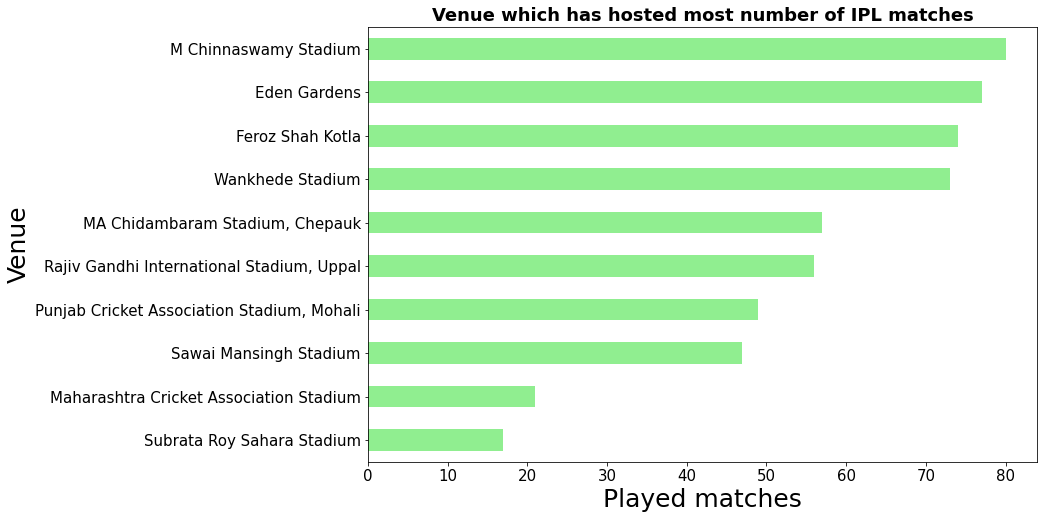

In [35]:
match.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind= 'barh',figsize=(12,8),fontsize = 15,color = 'lightgreen' )
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.xlabel("Played matches",size = 25)
plt.ylabel("Venue",size = 25)


Chinaswamy stadium has hosted highest number of matches.

Which team has maximum wins in IPL so far?

In [36]:

#creating a dataframe with season and winner columns
winning_teams = match[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

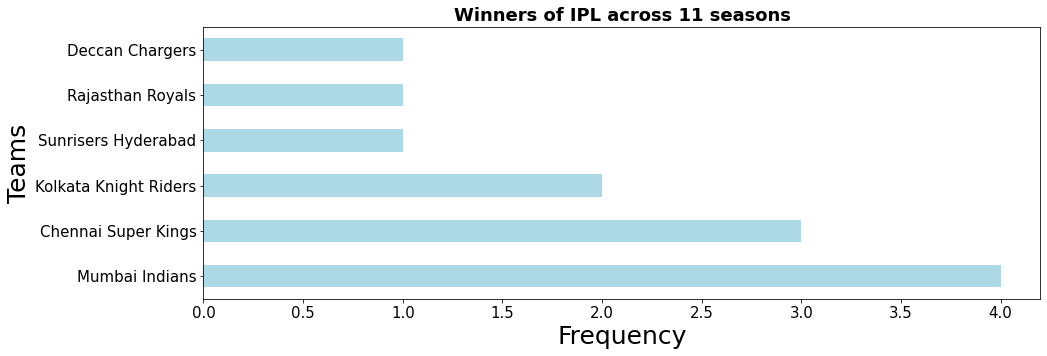

In [37]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'lightblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

MI and CSK has won 4 & 3 times respectively followed by KKR who has won 2 times.
Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

Does teams choosed to bat or field first, after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

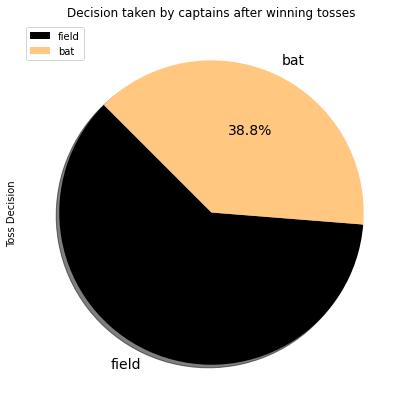

In [38]:
match['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='copper')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

Close to 60% times teams who have won tosses have decided to chase down
#How toss decision affects match results?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

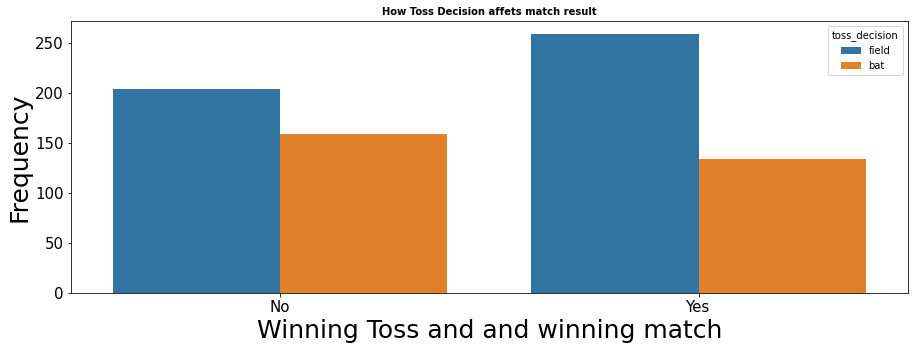

In [41]:
match['toss_win_game'] = np.where((match.toss_winner == match.winner),'Yes','No')
plt.figure(figsize=(15,5))
sns.countplot('toss_win_game',data= match, hue = 'toss_decision')
plt.title("How Toss Decision affets match result",fontsize = 10,fontweight = "bold")
plt.xticks(size = 15)
plt.yticks(size=15)
plt.xlabel("Winning Toss and and winning match",fontsize = 25)
plt.ylabel("Frequency",fontsize=25)

Teams winnings tosses and electing to field first have won most numberof times.

#Individual teams decision to choose bat or field after winning toss.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

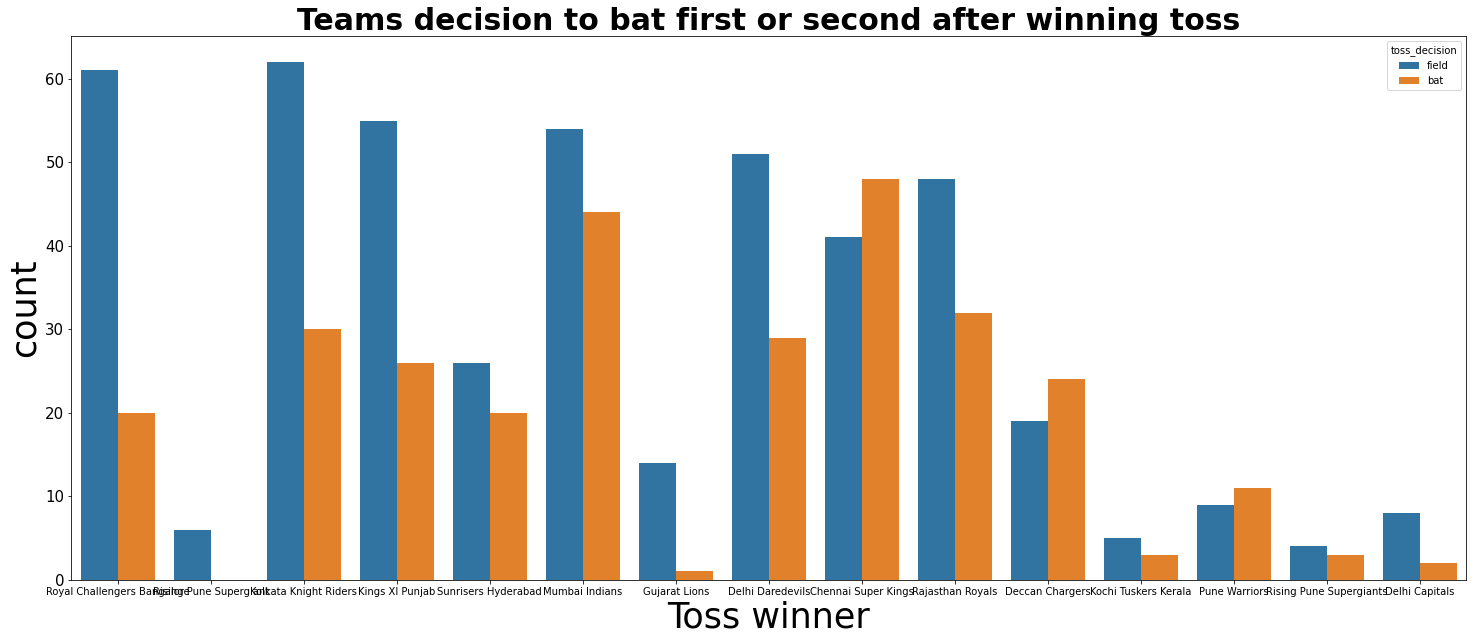

In [71]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner',data = match, hue = 'toss_decision',orient = "h")
plt.title('Teams decision to bat first or second after winning toss',size = 30,fontweight="bold")
plt.xticks(size=10)
plt.yticks(size = 15)
plt.xlabel('Toss winner',size = 35)
plt.ylabel('count',size = 35)

Most teams fielded first after winning toss expect for CSK who mostly opted to bat first Deccan charges and pune warrriors also show the same trend.

#Which player's performance has mostly led team's win?

Text(0.5, 0, 'Players')

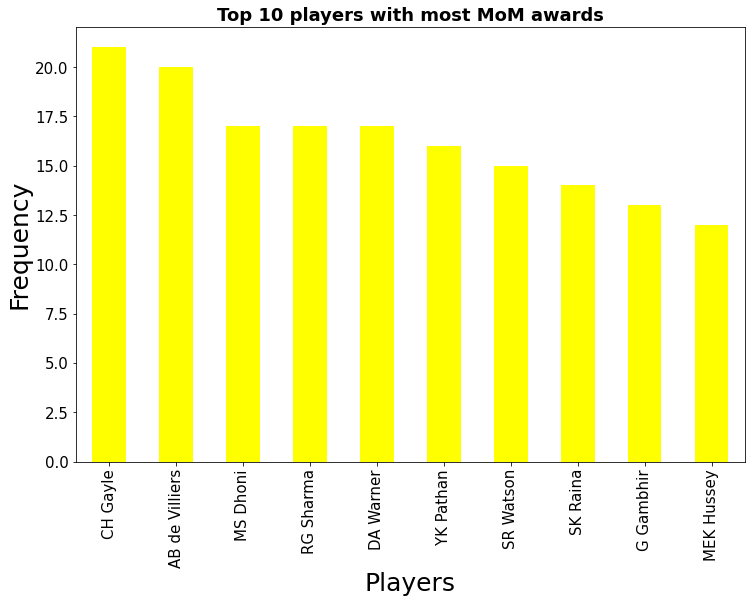

In [45]:
MoM= match['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='yellow')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.
# Top Run Getters of IPL.

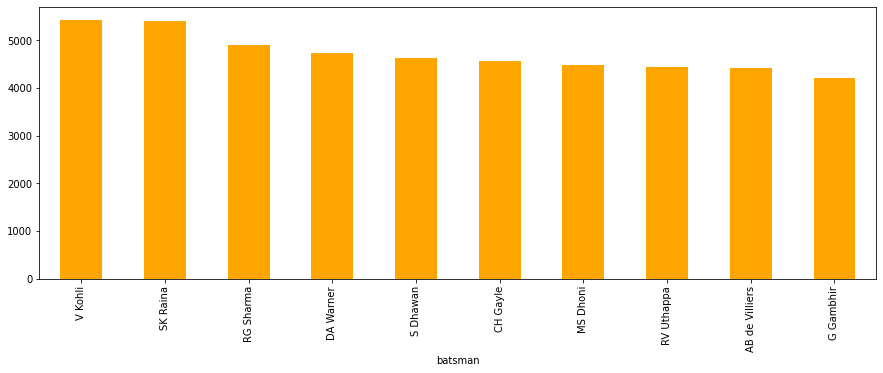

In [59]:
merge = pd.merge(deliveries,match,left_on = 'match_id',right_on = 'id')
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'orange', figsize = (15,5))


Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat


Virat kohli is the highest run getter in IPL.

Which bowlers have performed the best?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

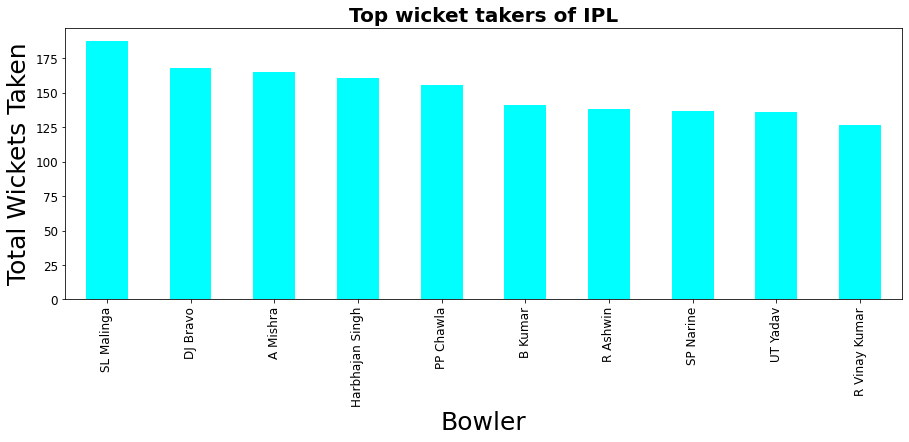

In [62]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False,).head(10).plot(kind = 'bar', color = 'cyan', figsize = (15,5))

plt.title("Top wicket takers of IPL",fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra

#Batsmen with the best strike rates over the years .

In [64]:
# total no. of balls played
total_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) 

# total runs scored

runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())

# total no. of seasons played for each batsman

seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique())

batsman_sr = pd.DataFrame({'balls': total_balls['ball'],'run':runs['batsman_runs'],'season': seasons['season']})
batsman_sr.reset_index(inplace = True)

batsman_sr['strike_rate'] = batsman_sr['run']/batsman_sr['balls']*100
highest_strike_rate = batsman_sr[batsman_sr.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

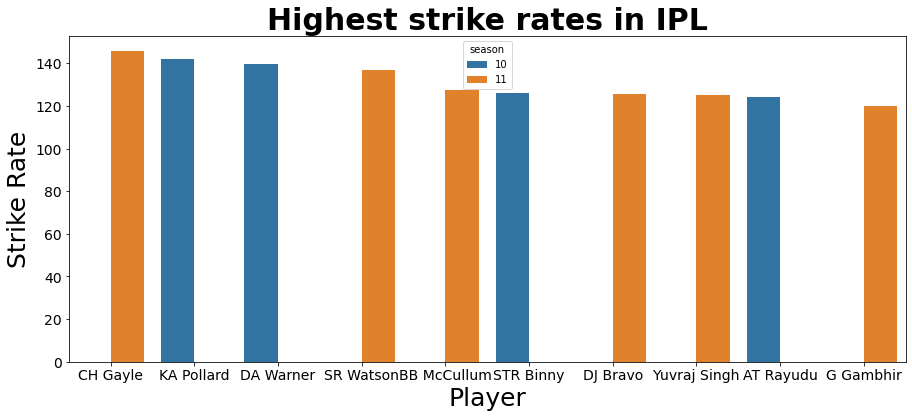

In [65]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

Gayle have the highest strike rates in IPL.

# Bowlers with maximum number of extras.

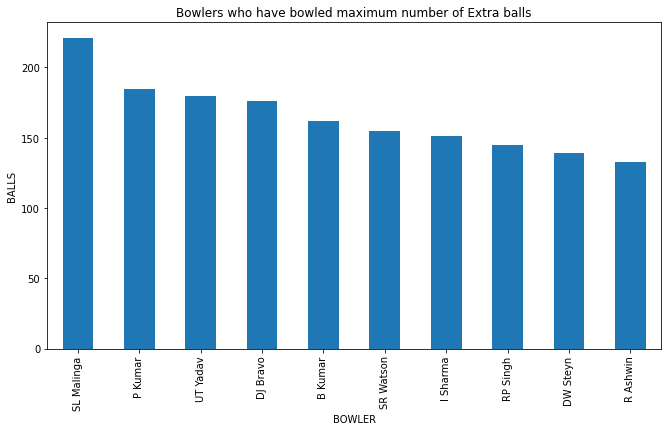

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [66]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

#Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:

1. Mumbai Indians has the most tropies, and hence the most successful team in IPL.
2. Virat Kohli is the highest run scorer in the IPL.
3. Lasith Malinga is the highest wicket taker in the IPL.
4.There were more matches won by chasing the total(419 matches) than defending(350 matches).
5. When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
6. Chris Gayle has won the maximum number of player of the match title.
7. If a team wins a toss choose to field first as it has highest probablity of winning.





# Q2. Teams or Players a company should endorse for its products.

1. Consistent batsman through out the IPL are V Kohli, S Raina, Rohit Sharma, David Warner...

2. Playes with good strike rate are Chris Gayle AB deVillers, MS Dhoni..

